# Well Pumping Program Example
#### Prof. Gretchen Miller, Texas A&M University
#### Introduction to Groundwater Engineering

## About the Theis Equation
This program uses the Theis equation to find the drawndown due to pumping in a confined aquifer. The conceptual diagram below shows the general well configuration and the relevant variables.

<img src="theis_diagram.gif" alt="theis_diagram" width="400"/>

The equation representing drawdown given as: 

$$H_0 - H = \frac{Q}{4 \pi T} \int_{u}^{\infty} \frac{e^{-a}}{a}\,da$$

where

$$u = \frac{r^2S}{4Tt}$$

## Defining our Paramters and Inputs
First, we need to define our constant aquifer parameters, which are specific storage($Ss$), in units of 1/m; hydraulic conductivity ($K$), in units of $m$/$s$; and aquifer thickness ($b$), in units of m. Be sure to use decimals so that Python knows that these values should be typed as floating points.

In [1]:
Ss = 1.0e-5   # in 1/m
K = 4.0e-5  # in m/s
b = 100.0   # in m

Next, we need to specify our pumping rate, here entered in gallons per minute:

In [2]:
Q = 10.0   # in gpm

Finally, we need to specify the time $(t)$, in days, and the distance from the well $(r)$, in meters, at which we want to find drawdown. Remember that Python variables are case sensitive, so we can use both t and T, like we would do in the mathematical equation!

In [3]:
r = 1000.0  # in m
t = 10.0    # in d

Now we need to do a bit of cleanup - unit conversions and such. We calculate transmissivity $(T)$, in units of $m^2$/$s$, as $T=Kb$, and storativity ($S$), unitless, as $S = Ss*b$. We also need to convert $t$ to seconds from days and $Q$ to $m^3/s$ from $gallons/min$. 

In [4]:
T = K*b
S = Ss*b
t = t*24*60*60
Q = Q * 6.30901964e-5

## Calculating the Well Function
Now we need to call a function to calculate the well function, which is given as 

$\int_{u}^{\infty} \frac{e^{-a}}{a}\,da = W(u) = -0.57721566 - ln(u) + u -\frac{u^2}{2*2!} + \frac{u^3}{3*3!} -\frac{u^4}{4*4!} + ...$

To evaluate this function, we need to specify our accuracy and calculate our u value from the previous entries. We also need to check that the value of u is valid (i.e., u<=100).

In [5]:
tol = 1e-12
u = ((r**2)*S)/(4*T*t)
if u>100:
    print('Invalid u =', u)

Now we can import the function from the well_fxn_script.py file in the same directory, and call the function to get a value for $W(u)$ that is within the accuracy we want.

In [6]:
import well_fxn_script as wf
wu = wf.well_fxn(u,tol)
print('W(u) = %.2e' % wu)

W(u) = 2.12e+00


## Calculating Drawdown
Now we need to calculate the drawdown, $H - H_0$, based on this $W(u)$. We also have to import the numpy library so that we can get a value for $\pi$.

In [7]:
import numpy as np
drawdown = Q/(4*T*np.pi)*wu
print('Drawdown = %.2e m' % drawdown)

Drawdown = 2.66e-02 m


## Plotting Drawdown
While this is handy, we might have been better off just opening our textbook and finding the answer off the lookup table in the appendix. The true power of the program comes when we use it to calculate W(u) multiple times. This method allows us to create a plot of drawdown over time at a particular distance or a plot of drawdown as a function of distance at a particular time.

### Computations - Drawdown over Time
Here, we will input a range of times since pumping started and the distance from the well specified as $r$ above. We will input a time initial $(t_{initial})$ and a time final $(t_{final})$, both in days.

In [8]:
ti = 0 # Time in days
tf = 300

Now we will convert the times to seconds to match the rest of our units and then create a vector of times at equal intervals between them using the linspace function in the numpy library. We also check that our first value is not equal to zero, and if it is, we replace it with a value between it and the second value. This prevents divide by zero errors.

In [9]:
ti = ti*24*60*60
tf = tf*24*60*60
t_vec = np.linspace(ti,tf,num=100) 
if t_vec[0]==0:
    t_vec[0]=(t_vec[0]+t_vec[1])*0.1

Now we need to calculate a vector of u values based on our time values:

In [10]:
u_vec = r**2*S/(4*T*t_vec)

This is where we get a touch "fancy" with our Python code. What we want to do is use our well_fxn routine to calculate a W(u) value for each u. This is a very common "design pattern" in programming, so Python provides us with a special built-in "map" function to do this. But since the well function takes two parameters, and the second parameter is a constant and not something we have to iterate over, we need to use the lambda function as well. Once we do all this, we convert the map object that's been created back into a list.

In [11]:
t_drawdown = list(map(lambda u_vec: wf.well_fxn(u_vec,tol)*Q/(4*T*np.pi),u_vec))
# print(t_drawdown)

### Results - Drawdown over Time
Now we need to plot! First, we import pyplot from the matplotlib library, and then we use the plotting function

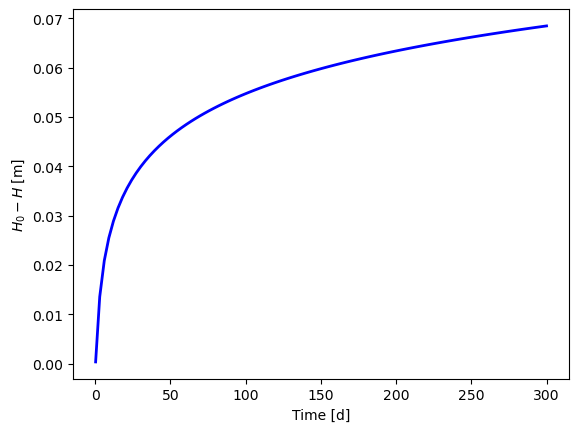

In [12]:
import matplotlib.pyplot as plt
plt.plot(t_vec/60/60/24,t_drawdown,'b-',linewidth=2)
plt.xlabel('Time [d]')
plt.ylabel('$H_0-H$ [m]')
plt.show()

### Computations - Drawdown over Space
Here, we will input a range of distances from the well and the time since pumping began. We will input a radius of $(r_{well})$ to indicate the place to start calculating drawdown and a maximum radius $(r_{max})$, both in meters.
We then repeat the same basic procedure as above, except with variable space instead of time. The time is given as $t$ above.

In [13]:
rwell = 0.15 # in meters, equivalent to an approximately 12" diameter well
rmax = 1000
r_vec = np.linspace(rwell,rmax,num=100)
u_vec = r_vec**2*S/(4*T*t)
r_drawdown = list(map(lambda u_vec: wf.well_fxn(u_vec,tol)*Q/(4*T*np.pi),u_vec))

### Results - Drawdown over Space
Repeat the plotting with the new values.

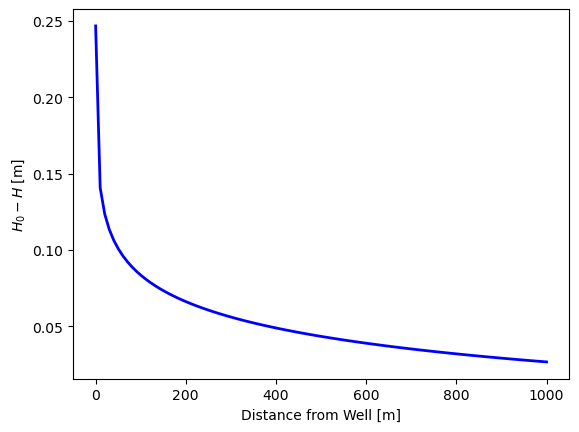

In [14]:
plt.plot(r_vec,r_drawdown,'b-',linewidth=2)
plt.xlabel('Distance from Well [m]')
plt.ylabel('$H_0-H$ [m]')
plt.show()